# Introduction to Convolutional Neural Networks and computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The image we're working with are from the Food101 dataset (101 classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak).

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-30 10:12:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  23.9MB/s    in 5.4s    

2023-03-30 10:12:23 (19.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of data.

In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
import os

# Waltk through pizza_steak dir and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in the {dirpath}")

There are 2 directories and 0 images in the pizza_steak
There are 2 directories and 0 images in the pizza_steak/test
There are 0 directories and 250 images in the pizza_steak/test/steak
There are 0 directories and 250 images in the pizza_steak/test/pizza
There are 2 directories and 0 images in the pizza_steak/train
There are 0 directories and 750 images in the pizza_steak/train/steak
There are 0 directories and 750 images in the pizza_steak/train/pizza


In [5]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [6]:
# Get the classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names in subdirectory
print(class_names)

['pizza' 'steak']


In [19]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images)
  target_folder = target_dir + target_class
  
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
   
  return img

In [20]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

FileNotFoundError: ignored

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 13,   3,   2],
        [ 13,   3,   2],
        [ 13,   3,   2],
        ...,
        [  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2]],

       [[ 13,   3,   2],
        [ 13,   3,   2],
        [ 14,   4,   3],
        ...,
        [  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2]],

       [[ 13,   3,   2],
        [ 13,   3,   2],
        [ 13,   3,   2],
        ...,
        [  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2]],

       ...,

       [[ 60,  91,  76],
        [ 57,  88,  73],
        [ 55,  86,  71],
        ...,
        [193, 179, 150],
        [196, 182, 155],
        [197, 183, 156]],

       [[ 60,  91,  76],
        [ 57,  88,  73],
        [ 56,  87,  72],
        ...,
        [194, 180, 153],
        [194, 182, 156],
        [196, 184, 158]],

       [[ 59,  90,  75],
        [ 57,  88,  73],
        [ 56,  87,  72],
        ...,
        [193, 179, 15

In [10]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.05098039, 0.01176471, 0.00784314],
        [0.05098039, 0.01176471, 0.00784314],
        [0.05098039, 0.01176471, 0.00784314],
        ...,
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314]],

       [[0.05098039, 0.01176471, 0.00784314],
        [0.05098039, 0.01176471, 0.00784314],
        [0.05490196, 0.01568627, 0.01176471],
        ...,
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314]],

       [[0.05098039, 0.01176471, 0.00784314],
        [0.05098039, 0.01176471, 0.00784314],
        [0.05098039, 0.01176471, 0.00784314],
        ...,
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314]],

       ...,

       [[0.23529412, 0.35686275, 0.29803922],
        [0.22352941, 0.34509804, 0.28627451],
        [0.21568627, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess daat (get all the pixel values between 0 & 1 - normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data fro directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # same as the one above
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 219ms/step - loss: 0.6307 - accuracy: 0.6327 - val_loss: 0.4678 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4468 - accuracy: 0.7953 - val_loss: 0.3518 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4066 - accuracy: 0.8153 - val_loss: 0.3440 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3323 - accuracy: 0.8633 - val_loss: 0.4724 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 12s 266ms/step - loss: 0.3214 - accuracy: 0.8673 - val_loss: 0.3169 - val_accuracy: 0.8720


In [13]:
# Epoch 1/5
# 47/47 [==============================] - 147s 3s/step - loss: 0.5660 - accuracy: 0.7047 - val_loss: 0.4572 - val_accuracy: 0.8060


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 239ms/step - loss: 3.1305 - accuracy: 0.5160 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), our model performs terribly, let's try improving it

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 254ms/step - loss: 3.1862 - accuracy: 0.6173 - val_loss: 1.2269 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.7811 - accuracy: 0.7260 - val_loss: 0.5511 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.9597 - accuracy: 0.6827 - val_loss: 1.0645 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 1.0415 - accuracy: 0.6973 - val_loss: 0.5533 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.8404 - accuracy: 0.7327 - val_loss: 0.4854 - val_accuracy: 0.7740


In [18]:
# Get a summary of model_3
model_3.summary() # this one is really bad in comparison with first model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

### 1. Become one with the data

['3724677.jpg']
Image shape: (512, 512, 3)
['1289139.jpg']
Image shape: (512, 512, 3)


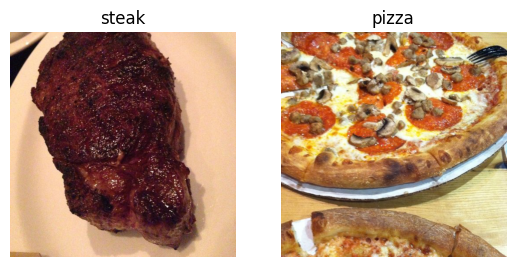

In [19]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subste of the data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target dir
                                               target_size=(224, 224), # target size of img
                                               class_mode="binary", # type of data
                                               batch_size=32) # size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of training data batch
images, labels = train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data)

47

In [25]:
# Get the first two images
images[:2], images[0].shape,

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

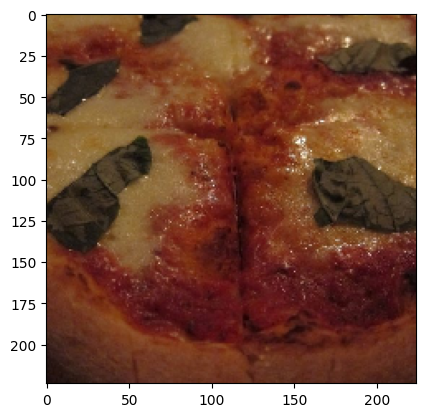

In [26]:
plt.imshow(images[5])

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a three layer cnn)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # size of the sliding window going across the input
           strides=1, # size of the step the sliding window takes across the input
           padding="valid", # valid = losses information on edges, "same" - leaves the margin
           activation="relu",
           input_shape=(224, 224, 3)), # input layer shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [30]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
# Get summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Cheeck the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
#  fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 211ms/step - loss: 2.1497 - accuracy: 0.6560 - val_loss: 0.4690 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4816 - accuracy: 0.7827 - val_loss: 0.4201 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3829 - accuracy: 0.8453 - val_loss: 0.3672 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.2956 - accuracy: 0.8940 - val_loss: 0.3552 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.1588 - accuracy: 0.9560 - val_loss: 0.3444 - val_accuracy: 0.8440


### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it

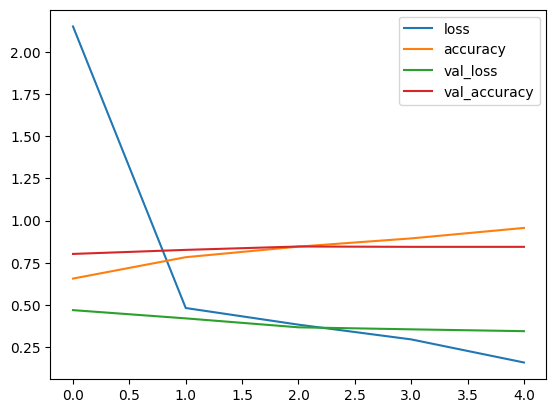

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot loss curve
pd.DataFrame(history_4.history).plot()
plt.legend();

In [35]:
# Plot the validation and training curves separately
def plot_loss(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  accuracy = history.history["accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

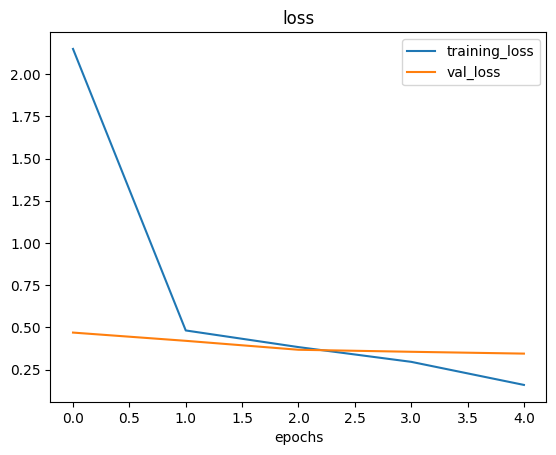

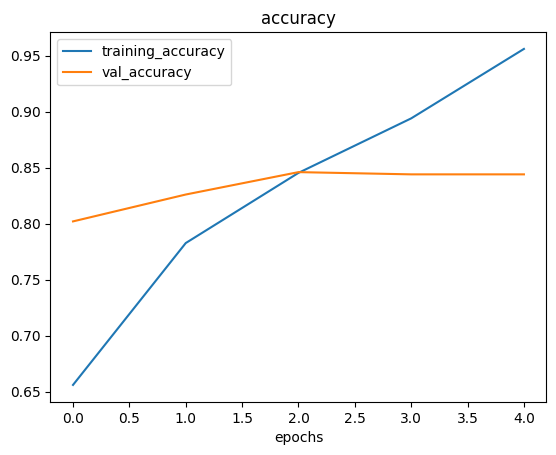

In [36]:
# Check out the loss anda accuracy of model 4
plot_loss(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

Reducing overfitting is also known as **regularization**

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [38]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 203ms/step - loss: 0.6255 - accuracy: 0.6340 - val_loss: 0.5276 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4633 - accuracy: 0.7927 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3942 - accuracy: 0.8313 - val_loss: 0.3559 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3841 - accuracy: 0.8287 - val_loss: 0.3270 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3665 - accuracy: 0.8440 - val_loss: 0.3321 - val_accuracy: 0.8660


In [40]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

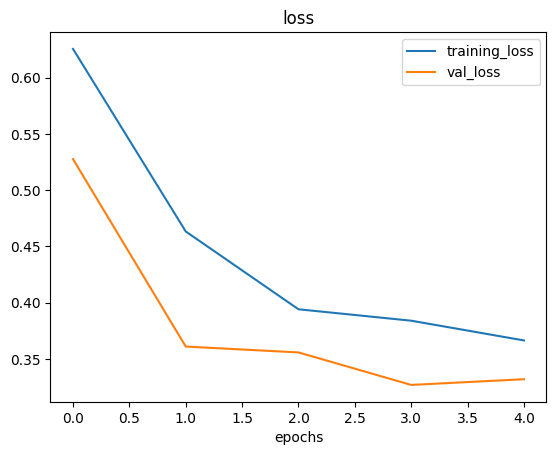

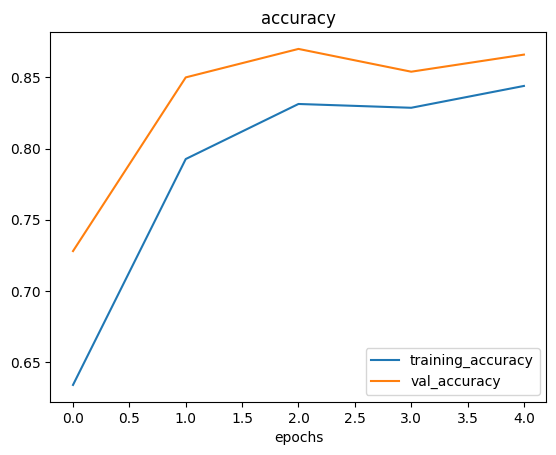

In [41]:
# Plot loss curves
plot_loss(history_5)

### Opening our bag of tricks and finding data augumentation

ImageDataGenerator is deprecated. Let's use another method.

In [47]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data import Dataset
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Create sequence with data augumentation
data_augumentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2, 0.2)
])

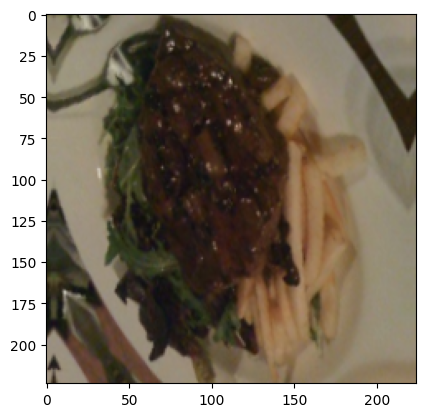

In [64]:
plt.imshow(data_augumentation(train_data[0][0][9]));

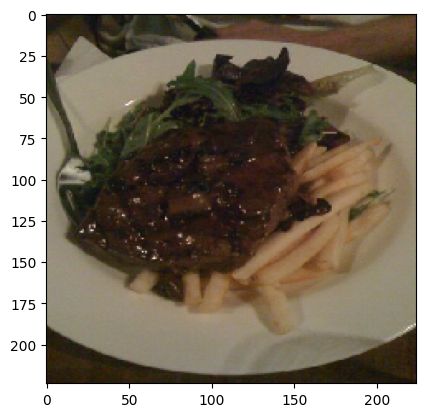

In [65]:
plt.imshow(train_data[0][0][9]);

In [48]:
# Create the model
model_6 = Sequential([
    data_augumentation,
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
# Fit the model
history_6 = model_6.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


47/47 [==============================] - 24s 352ms/step - loss: 0.6369 - accuracy: 0.6213 - val_loss: 0.5296 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 16s 349ms/step - loss: 0.5070 - accuracy: 0.7560 - val_loss: 0.3931 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 16s 349ms/step - loss: 0.4421 - accuracy: 0.7947 - val_loss: 0.3435 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4577 - accuracy: 0.7980 - val_loss: 0.3491 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 16s 344ms/step - loss: 0.4285 - accuracy: 0.8120 - val_loss: 0.3499 - val_accuracy: 0.8360


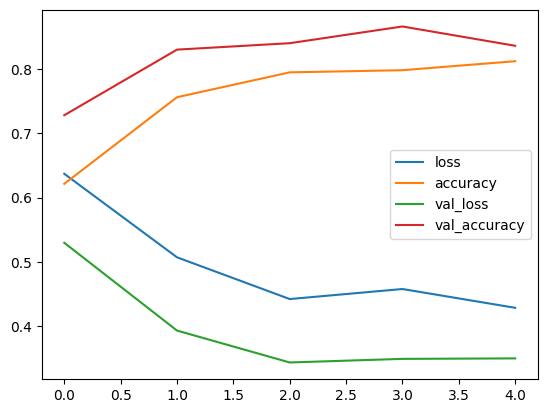

In [66]:
# Plot loss curves
pd.DataFrame(history_6.history).plot()
plt.legend();

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more oportunities to learn
* Use **transfer learning** to leverage what another image model has learned and adjust it for out own use case

## Making a prediuction with our trained model on our own custom data

In [67]:
# Classes we're wortking with
print(class_names)

['pizza' 'steak']


In [68]:
# View our example image
import matplotlib.image as mpimg

pizza_1 = mpimg.imread("/content/pizza_1.jpg")
pizza_2 = mpimg.imread("/content/pizza_2.jpg")

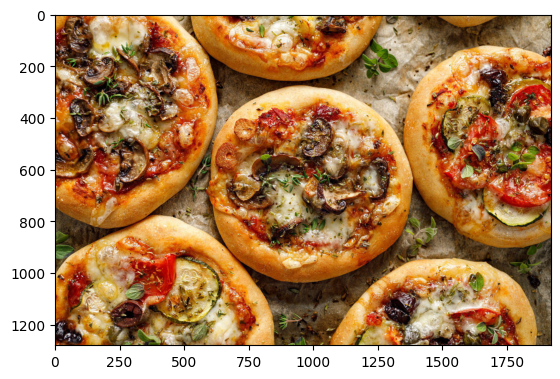

In [69]:
plt.imshow(pizza_1)

In [72]:
# Create a function to import an image and resize it to be able to be used with our nn
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img / 255.0

  return img

In [74]:
pizza_1 = tf.expand_dims(load_and_prep_image("/content/pizza_1.jpg"), axis=0)
pizza_2 = tf.expand_dims(load_and_prep_image("/content/pizza_2.jpg"), axis=0)
pizza_1.shape, pizza_2.shape

(TensorShape([1, 224, 224, 3]), TensorShape([1, 224, 224, 3]))

In [89]:
# Make predictions on our data
pred_1 = model_6.predict(pizza_1)
predicted_class_1 = tf.cast(tf.round(tf.squeeze(pred_1)), dtype=tf.int32).numpy()
class_names[predicted_class_1]

1/1 [==============================] - 0s 30ms/step


'pizza'

In [90]:
pred_2 = model_6.predict(pizza_2)
predicted_class_2 = tf.cast(tf.round(tf.squeeze(pred_2)), dtype=tf.int32).numpy()
class_names[predicted_class_2]

1/1 [==============================] - 0s 61ms/step


'pizza'

In [77]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [97]:
def make_prediction(model, filename, classes):
  img = load_and_prep_image(filename, img_shape=224)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = classes[int(tf.round(pred))]

  # Plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ({tf.squeeze(pred):.3f})")
  plt.axis(False);

1/1 [==============================] - 0s 29ms/step


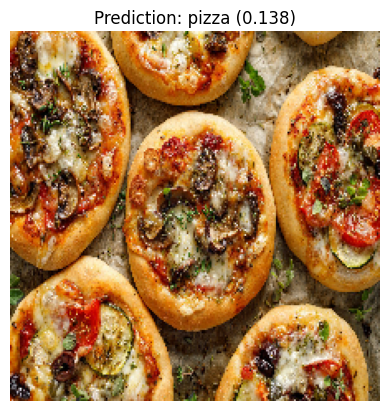

In [98]:
# test our model on a custom image
make_prediction(model_6, "/content/pizza_1.jpg", classes=class_names)

1/1 [==============================] - 0s 35ms/step


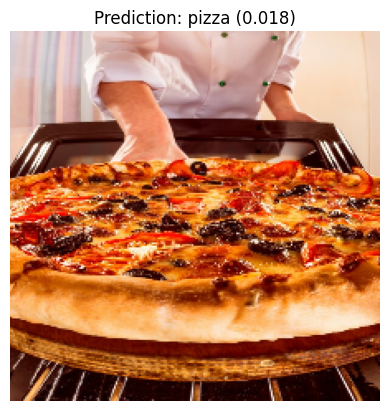

In [99]:
make_prediction(model_6, "/content/pizza_2.jpg", classes=class_names)

1/1 [==============================] - 0s 34ms/step


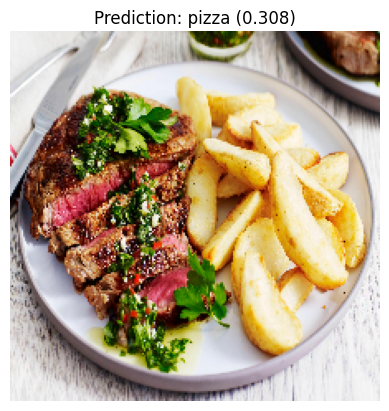

In [100]:
make_prediction(model_6, "/content/steak.jpeg", classes=class_names)

1/1 [==============================] - 0s 34ms/step


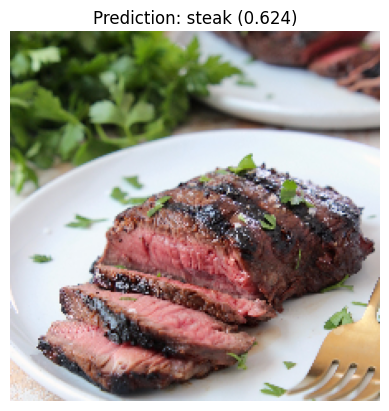

In [101]:
make_prediction(model_6, "/content/steak_2.jpg", classes=class_names)

## Multi-class image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [4]:
## 1. Import and become one with the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-30 14:02:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   119MB/s    in 4.7s    

2023-03-30 14:03:02 (106 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [5]:
import os

# Walkt through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 images in 10_fo

In [6]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [18]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

NameError: ignored

### 2. Preprocess the data (prepare it for a model)

In [21]:
# Import images
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                          labels="inferred",
                                          label_mode='int',
                                          batch_size=32,
                                          image_size=(224, 224),
                                          shuffle=True,
                                          seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                         labels="inferred",
                                         label_mode='int',
                                         batch_size=32,
                                         image_size=(224, 224),
                                         shuffle=True,
                                         seed=42)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
# Setup rescaling layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Setup augumentation layer
augumentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomZoom(0.2, 0.2)
])

In [130]:
# Create the baseline model
baseline_model = tf.keras.Sequential([
    normalization_layer,
    augumentation_layer,
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [131]:
# Compile the baseline model
baseline_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [132]:
# Fit the baseline model
baseline_model_hist = baseline_model.fit(train_data,
                                         steps_per_epoch=len(train_data),
                                         epochs=5,
                                         validation_data=test_data,
                                         validation_steps=len(test_data))

Epoch 1/5


235/235 [==============================] - 77s 291ms/step - loss: 2.1626 - accuracy: 0.2016 - val_loss: 2.0195 - val_accuracy: 0.2584
Epoch 2/5
235/235 [==============================] - 68s 289ms/step - loss: 2.0234 - accuracy: 0.2665 - val_loss: 1.9739 - val_accuracy: 0.2852
Epoch 3/5
235/235 [==============================] - 67s 282ms/step - loss: 1.9744 - accuracy: 0.3000 - val_loss: 1.9268 - val_accuracy: 0.3144
Epoch 4/5
235/235 [==============================] - 68s 285ms/step - loss: 1.9291 - accuracy: 0.3247 - val_loss: 1.9086 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 68s 290ms/step - loss: 1.9098 - accuracy: 0.3335 - val_loss: 1.8904 - val_accuracy: 0.3332


In [133]:
# View summary of our model
baseline_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

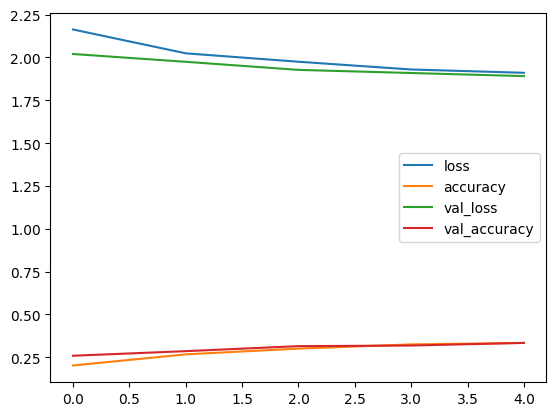

In [134]:
# View loss curves
pd.DataFrame(baseline_model_hist.history).plot()
plt.legend()

## 5. Evaluate the model

In [135]:
# Evaluate on the test data
baseline_model.evaluate(test_data)

79/79 [==============================] - 7s 67ms/step - loss: 1.8904 - accuracy: 0.3332


[1.8904222249984741, 0.33320000767707825]

Checkout the augumented data

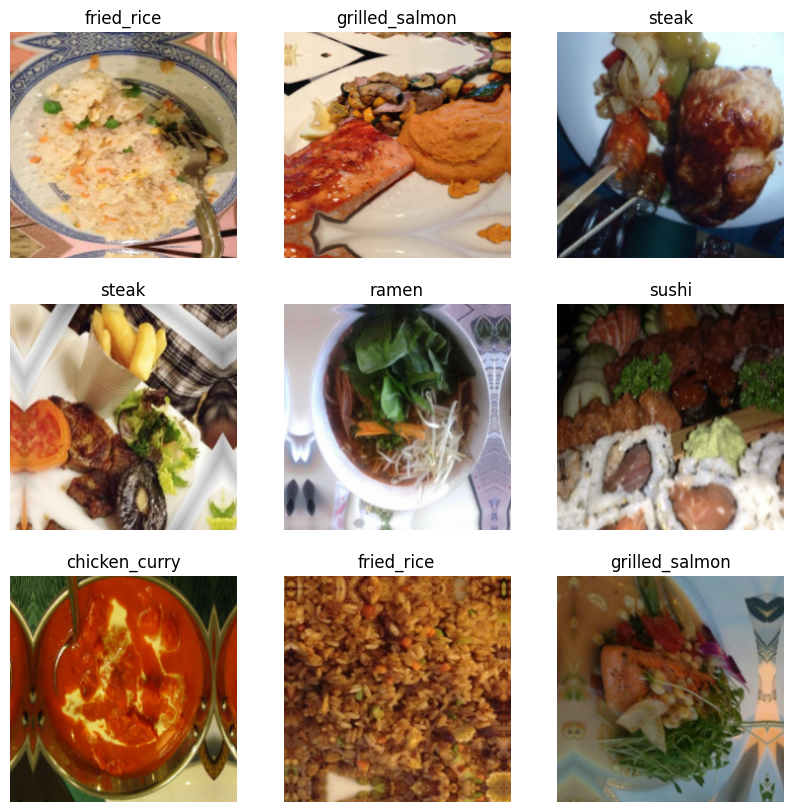

In [176]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augumentation_layer(images[i]).numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### 6. Adjust the model hyperparameters (to beat the baseline and improve results)

We can improve the score, by:
* **Getting more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our cuirrent model is overfitting thje data, it may be too complicated
* **Use data augumentation** - data augumentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [180]:
# How about we try and simplify the model first
# Let's try to remove 3 convolutional layers
model_8 = tf.keras.Sequential([
    normalization_layer,
    augumentation_layer,
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [182]:
# Fit the model
history_8 = model_8.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


235/235 [==============================] - 69s 264ms/step - loss: 2.1844 - accuracy: 0.1964 - val_loss: 2.0367 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 67s 282ms/step - loss: 2.0293 - accuracy: 0.2751 - val_loss: 1.9902 - val_accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 60s 255ms/step - loss: 1.9675 - accuracy: 0.3145 - val_loss: 1.9544 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 60s 254ms/step - loss: 1.9382 - accuracy: 0.3203 - val_loss: 1.9242 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 60s 256ms/step - loss: 1.9175 - accuracy: 0.3285 - val_loss: 1.8811 - val_accuracy: 0.3380


In [183]:
# Get model summary
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                

In [32]:
img = tf.io.read_file("pizza_1.jpg")
# Decode the read file into a tensor
img = tf.image.decode_image(img)

In [33]:
img

<tf.Tensor: shape=(1280, 1920, 3), dtype=uint8, numpy=
array([[[213, 157,  74],
        [221, 163,  79],
        [231, 172,  82],
        ...,
        [127,  95,  48],
        [159, 126,  73],
        [170, 135,  81]],

       [[224, 168,  85],
        [225, 167,  83],
        [229, 169,  81],
        ...,
        [104,  73,  26],
        [136, 103,  52],
        [150, 117,  63]],

       [[234, 177,  96],
        [230, 172,  88],
        [227, 167,  79],
        ...,
        [ 80,  52,   5],
        [115,  83,  34],
        [138, 107,  53]],

       ...,

       [[191, 104,  11],
        [190,  99,   6],
        [194,  91,   0],
        ...,
        [ 81,  66,  35],
        [ 85,  70,  39],
        [ 58,  45,  13]],

       [[189, 110,   9],
        [191, 105,   4],
        [194,  96,   0],
        ...,
        [ 78,  61,  31],
        [ 87,  70,  40],
        [ 77,  62,  31]],

       [[190, 113,   7],
        [191, 108,   2],
        [196, 100,   0],
        ...,
        [ 76,  59, 

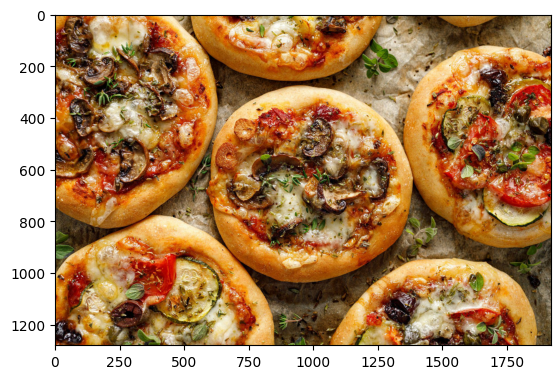

In [34]:
plt.imshow(img)

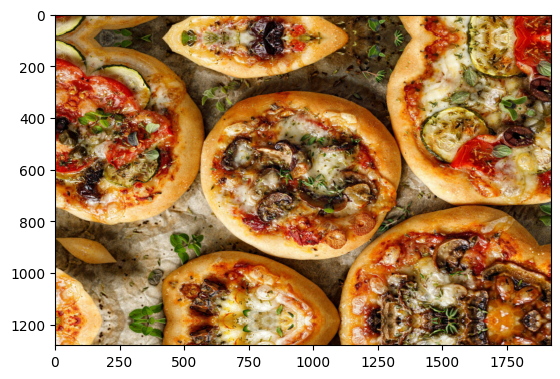

In [35]:
plt.imshow(augumentation_layer(normalization_layer(img)))

In [42]:
# Setup another augumentation layer
augumentation_layer_2 = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=(-0.2, 0.3)),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomZoom(height_factor=(0.1, 0.1), width_factor=(0.1, 0.1))
])

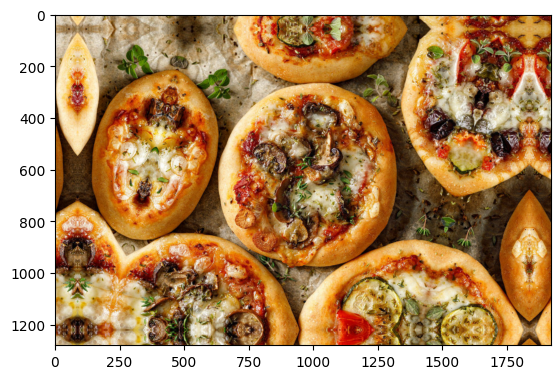

In [39]:
plt.imshow(augumentation_layer_2(normalization_layer(img)))

In [43]:
# Create the model
model_9 = tf.keras.Sequential([
    normalization_layer,
    augumentation_layer_2,
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_9 = model_9.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


235/235 [==============================] - 83s 315ms/step - loss: 2.2190 - accuracy: 0.1615 - val_loss: 2.1569 - val_accuracy: 0.1996
Epoch 2/5
235/235 [==============================] - 73s 308ms/step - loss: 2.0892 - accuracy: 0.2379 - val_loss: 2.0211 - val_accuracy: 0.2748
Epoch 3/5
235/235 [==============================] - 73s 311ms/step - loss: 2.0102 - accuracy: 0.2769 - val_loss: 1.9497 - val_accuracy: 0.3036
Epoch 4/5
235/235 [==============================] - 74s 312ms/step - loss: 1.9478 - accuracy: 0.3055 - val_loss: 1.9054 - val_accuracy: 0.3264
Epoch 5/5
235/235 [==============================] - 79s 337ms/step - loss: 1.9096 - accuracy: 0.3247 - val_loss: 1.8961 - val_accuracy: 0.3232


In [26]:
model_9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 109, 109, 32)     0         
 2D)                                                             
                                                      

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test/accuracy

How?

By running lots of experiments, namely:
* Restructuring our model's architecture (increasing layres/hidden units)
* adjust the learning rate
* try different methods of data augumentation
* training for longer (e.g. 10 epochs instead of 5 epochs)

### Making predictions with our trained model

Let's use our trained model to make some predictions on our own custom images

In [25]:
# Reconfig pred_and_plot function to worek with multi-class images
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred)]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

### Saving and loading our model

In [45]:
# Save a model
model_9.save("saved_trained_model_9")